In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
import cv2
import pywt
from skimage.feature import local_binary_pattern, greycomatrix,greycoprops,hog
from skimage.filters import gabor
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report
import numpy as np

In [195]:
df=pd.read_csv("features_hog.csv")

In [196]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,outcome
0,0.847880,0.590548,48.085815,1.182206,0.911812,0.879355,0.606393,0.973839,0.129808,with helmet
1,0.685346,1.090516,138.541353,2.891792,0.805732,0.737047,0.600127,0.934522,0.285094,with helmet
2,0.843762,0.604311,44.511642,1.137569,0.910226,0.876347,0.632382,0.977506,0.113224,with helmet
3,0.688089,1.089681,181.972444,3.521278,0.801132,0.741974,0.614843,0.901392,0.405674,with helmet
4,0.861559,0.546654,63.677669,1.309211,0.918778,0.890248,0.432516,0.967031,0.161891,with helmet


In [197]:
l=LabelEncoder()

In [198]:
df["outcome"]=l.fit_transform(df.outcome)

In [199]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,outcome
0,0.847880,0.590548,48.085815,1.182206,0.911812,0.879355,0.606393,0.973839,0.129808,0
1,0.685346,1.090516,138.541353,2.891792,0.805732,0.737047,0.600127,0.934522,0.285094,0
2,0.843762,0.604311,44.511642,1.137569,0.910226,0.876347,0.632382,0.977506,0.113224,0
3,0.688089,1.089681,181.972444,3.521278,0.801132,0.741974,0.614843,0.901392,0.405674,0
4,0.861559,0.546654,63.677669,1.309211,0.918778,0.890248,0.432516,0.967031,0.161891,0


In [200]:
x = df.drop(['outcome'], axis='columns')
y = df.outcome

In [201]:
scalar = StandardScaler()
x = scalar.fit_transform(x)

In [202]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=.2, random_state=2)

In [203]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(98, 9) (98,) (25, 9) (25,)


In [204]:
#img=cv2.imread(r"C:\Users\user\Desktop\MCA\SEM 3\Project\programs\test_without_bg\hog\without\crop_head1.jpg")  
img=cv2.imread(r"C:\Users\user\Desktop\MCA\SEM 3\Project\programs\test_without_bg\hog\with\crop_head46.jpg")
#img = cv2.imread(r"C:\Users\user\Desktop\MCA\SEM 3\Helmet detection\images\BikesHelmets649.png")
#cv2.imshow("org img",img)
#cv2.waitKey(0)

In [205]:
img1= cv2.resize(img, (400,400))
c=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    
    #conversion of RGB images into Gray Scale
img = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
"""    
    # Otsu thresholding
ret,img_new = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
   
    # Sobel edge detection
img_new = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
    
fd, img = hog(img_new, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
"""

'    \n    # Otsu thresholding\nret,img_new = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)\n   \n    # Sobel edge detection\nimg_new = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)\n    \nfd, img = hog(img_new, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)\n'

In [206]:
# LBP
feat_lbp = local_binary_pattern(img,5,2,'uniform')
lbp_hist,_ = np.histogram(feat_lbp,8)
lbp_hist = np.array(lbp_hist,dtype=float)
lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.nansum(lbp_prob**2)
lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))  
        
lbphist_features = np.reshape(np.array(lbp_hist).ravel(),(1,len(np.array(lbp_hist).ravel())))
lbpprob_features=np.reshape(np.array(lbp_prob).ravel(),(1,len(np.array(lbp_prob).ravel())))
lbpenrgy_features=np.reshape(np.array(lbp_energy).ravel(),(1,len(np.array(lbp_energy).ravel())))
lbpento_features=np.reshape(np.array(lbp_entropy).ravel(),(1,len(np.array(lbp_entropy).ravel())))


        # GLCM
gCoMat = greycomatrix(img.astype(np.uint8), [1], [0],256,symmetric=True, normed=True)
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
homogeneity = greycoprops(gCoMat, prop='homogeneity')    
energy = greycoprops(gCoMat, prop='energy')
correlation = greycoprops(gCoMat, prop='correlation')    
        
contrast_features = np.reshape(np.array(contrast).ravel(),(1,len(np.array(contrast).ravel())))
dissimilarity_features=np.reshape(np.array(dissimilarity).ravel(),(1,len(np.array(dissimilarity).ravel())))
homogeneity_features=np.reshape(np.array(homogeneity).ravel(),(1,len(np.array(homogeneity).ravel())))
energy_features=np.reshape(np.array(energy).ravel(),(1,len(np.array(energy).ravel())))
correlation_features=np.reshape(np.array(correlation).ravel(),(1,len(np.array(correlation).ravel())))
    

        # Gabor filter
gaborFilt_real,gaborFilt_imag = gabor(img,frequency=0.6)
gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
gabor_hist,_ = np.histogram(gaborFilt,8)
gabor_hist = np.array(gabor_hist,dtype=float)
gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
gabor_energy = np.nansum(gabor_prob**2)
gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
       
gabor_hist_features = np.reshape(np.array(gabor_hist).ravel(),(1,len(np.array(gabor_hist).ravel())))
gabor_prob_features=np.reshape(np.array(gabor_prob).ravel(),(1,len(np.array(gabor_prob).ravel())))
gabor_ener_features=np.reshape(np.array(gabor_energy).ravel(),(1,len(np.array(gabor_energy).ravel())))
gabor_entr_features=np.reshape(np.array(gabor_entropy).ravel(),(1,len(np.array(gabor_entropy).ravel())))
       
#features=np.concatenate((lbphist_features,lbpprob_features,lbpenrgy_features,lbpento_features,contrast_features,dissimilarity_features,homogeneity_features,energy_features,correlation_features,gabor_hist_features,gabor_prob_features,gabor_ener_features,gabor_entr_features),axis=1);
features=np.concatenate((lbpenrgy_features,lbpento_features,contrast_features,dissimilarity_features,homogeneity_features,energy_features,correlation_features,gabor_ener_features,gabor_entr_features),axis=1);
        

C:\Users\user\AppData\Local\Temp\ipykernel_5588\2136797188.py:7: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
C:\Users\user\AppData\Local\Temp\ipykernel_5588\2136797188.py:7: RuntimeWarning: invalid value encountered in multiply
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
C:\Users\user\anaconda3\envs\user\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\user\anaconda3\envs\user\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\user\anaconda3\envs\user\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops

In [207]:
features=scalar.transform(features)
print(features)

[[-4.3705204   4.0758928  -0.23792957  1.11936698 -4.02446732 -4.5082801
  -0.30213886  0.97006786 -1.05660935]]


C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [208]:
classifier_svm = SVC(kernel='rbf', random_state=2,gamma='auto')  
classifier_svm.fit(x_train, y_train) 
y_pred_svm= classifier_svm.predict(x_test)
y_pred_svm

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0])

In [209]:
y1_pred= classifier_svm.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

With helmet


In [210]:
accuracy = metrics.accuracy_score(y_test, y_pred_svm)
accuracy 

0.56

In [211]:
cm1= confusion_matrix(y_test, y_pred_svm) 
cm1= np.asarray(cm1)
cm1

array([[7, 5],
       [6, 7]], dtype=int64)

C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


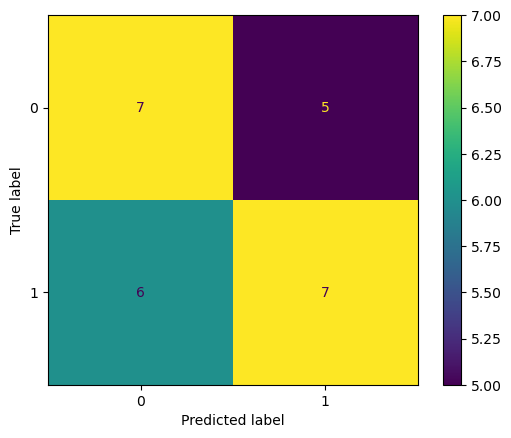

In [212]:
metrics.plot_confusion_matrix(classifier_svm, x_test, y_test)

In [213]:
m=classification_report(y_test,y_pred_svm)
print(m)

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.58      0.54      0.56        13

    accuracy                           0.56        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.56      0.56      0.56        25



In [214]:
import math
math.sqrt(len(y_test))

5.0

In [215]:
from sklearn.neighbors import KNeighborsClassifier  
classifier_knn =  KNeighborsClassifier(n_neighbors=5, metric='minkowski',algorithm = 'brute')  
classifier_knn.fit(x_train, y_train)  
y_pred_knn= classifier_knn.predict(x_test)  

In [216]:
accuracy = metrics.accuracy_score(y_test, y_pred_knn)
accuracy 

0.52

In [217]:
y1_pred= classifier_knn.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

With helmet


In [218]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_knn)

0.4999999999999999

In [219]:
cm2= confusion_matrix(y_test, y_pred_knn) 
cm2= np.asarray(cm2)
cm2

array([[7, 5],
       [7, 6]], dtype=int64)

In [220]:
m=classification_report(y_test,y_pred_knn)
print(m)

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.55      0.46      0.50        13

    accuracy                           0.52        25
   macro avg       0.52      0.52      0.52        25
weighted avg       0.52      0.52      0.52        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


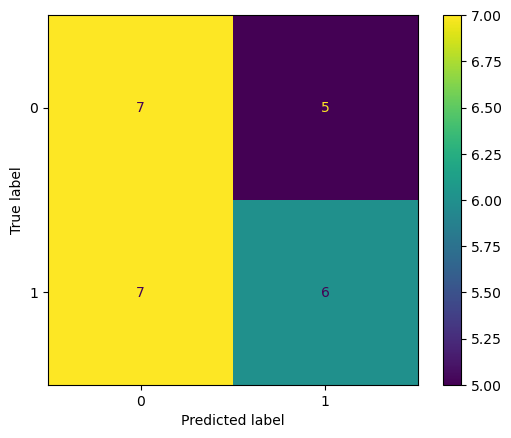

In [221]:
metrics.plot_confusion_matrix(classifier_knn, x_test, y_test)

In [222]:
from sklearn.ensemble import RandomForestClassifier
randclassi=RandomForestClassifier(criterion='gini',max_features='sqrt',n_jobs=2)
randclassi.fit(x_train, y_train)
y_pred_ranfor=randclassi.predict(x_test)
y_pred_ranfor

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0])

In [223]:
accuracy = metrics.accuracy_score(y_test, y_pred_ranfor)
accuracy 

0.56

In [224]:
y1_pred= randclassi.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

With helmet


In [225]:
cm3= confusion_matrix(y_test, y_pred_ranfor) 
cm3= np.asarray(cm3)
cm3

array([[8, 4],
       [7, 6]], dtype=int64)

In [226]:
m=classification_report(y_test,y_pred_ranfor)
print(m)

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.60      0.46      0.52        13

    accuracy                           0.56        25
   macro avg       0.57      0.56      0.56        25
weighted avg       0.57      0.56      0.56        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


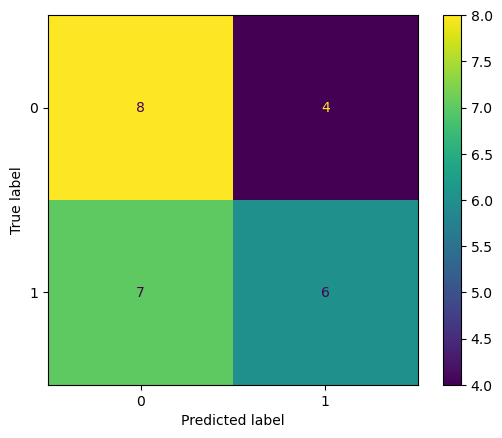

In [227]:
metrics.plot_confusion_matrix(randclassi, x_test, y_test)

In [228]:
from sklearn.naive_bayes import GaussianNB
classifier_gauss = GaussianNB()
classifier_gauss.fit(x_train, y_train)
y_pred_gauss=classifier_gauss.predict(x_test)
y_pred_gauss

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1])

In [229]:
accuracy = metrics.accuracy_score(y_test, y_pred_gauss)
accuracy 

0.52

In [230]:
y1_pred= classifier_gauss.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

With helmet


In [231]:
cm4= confusion_matrix(y_test, y_pred_gauss) 
cm4= np.asarray(cm4)
cm4

array([[5, 7],
       [5, 8]], dtype=int64)

In [232]:
m=classification_report(y_test,y_pred_gauss)
print(m)

              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.53      0.62      0.57        13

    accuracy                           0.52        25
   macro avg       0.52      0.52      0.51        25
weighted avg       0.52      0.52      0.52        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


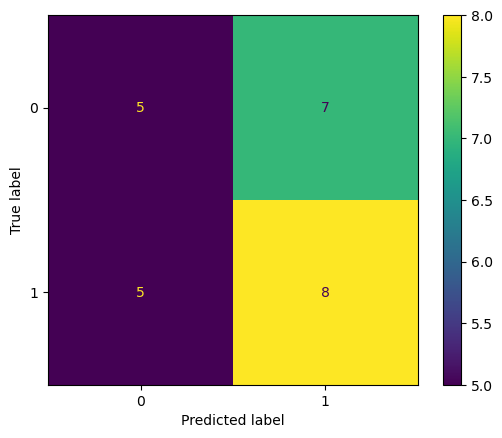

In [233]:
metrics.plot_confusion_matrix(classifier_gauss, x_test, y_test)

In [234]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtree = DecisionTreeClassifier(criterion = 'gini')
classifier_dtree.fit(x_train, y_train)
y_pred_dtree=classifier_dtree.predict(x_test)
y_pred_dtree

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

[Text(0.5961538461538461, 0.9444444444444444, 'X[3] <= 0.07\ngini = 0.497\nsamples = 98\nvalue = [45, 53]'),
 Text(0.38461538461538464, 0.8333333333333334, 'X[6] <= -0.498\ngini = 0.348\nsamples = 58\nvalue = [13, 45]'),
 Text(0.23076923076923078, 0.7222222222222222, 'X[4] <= 0.952\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.15384615384615385, 0.6111111111111112, 'X[6] <= -0.934\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.11538461538461539, 0.5, 'X[6] <= -1.031\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.07692307692307693, 0.3888888888888889, 'X[1] <= -0.378\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.038461538461538464, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.11538461538461539, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15384615384615385, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.19230769230769232, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.

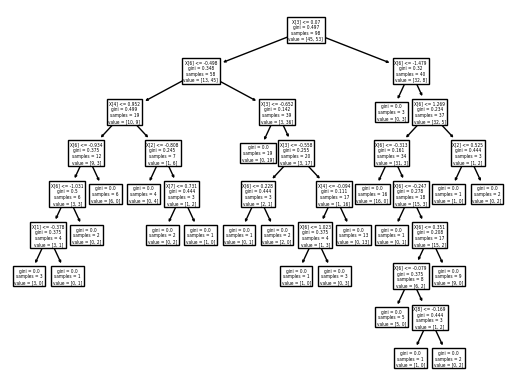

In [235]:
from sklearn import tree
tree.plot_tree(classifier_dtree)

In [236]:
y1_pred= classifier_dtree.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

Without helmet


In [237]:
accuracy = metrics.accuracy_score(y_test, y_pred_dtree)
accuracy 

0.72

In [238]:
cm6= confusion_matrix(y_test, y_pred_dtree)
cm6= np.asarray(cm6)
cm6

array([[11,  1],
       [ 6,  7]], dtype=int64)

In [191]:
m=classification_report(y_test,y_pred_dtree)
print(m)

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.88      0.54      0.67        13

    accuracy                           0.72        25
   macro avg       0.76      0.73      0.71        25
weighted avg       0.77      0.72      0.71        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


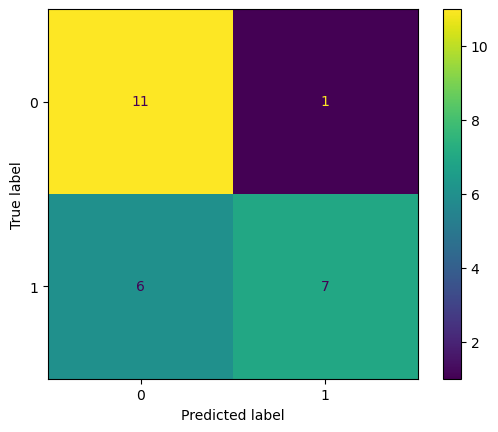

In [192]:
metrics.plot_confusion_matrix(classifier_dtree, x_test, y_test)

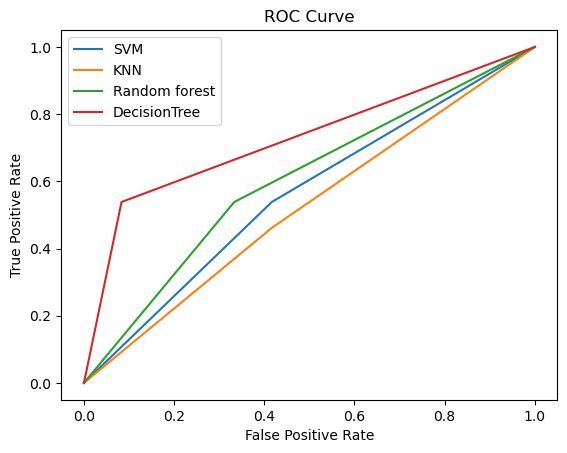

In [193]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_svm)
plt.plot(fpr1, tpr1, label = 'SVM')
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_knn)
plt.plot(fpr2, tpr2, label = 'KNN' )
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_ranfor)
plt.plot(fpr3, tpr3, label='Random forest')
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_dtree)
plt.plot(fpr6, tpr6, label='DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()